# Names: Ali Hisham Farouq , Sahar Hamdi Abdulhafeez
# IDs: 20200335 , 20201089

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image and convert it to a NumPy array

In [5]:
image = Image.open('happy_dog.jpg').convert("L")
image_array = np.array(image)

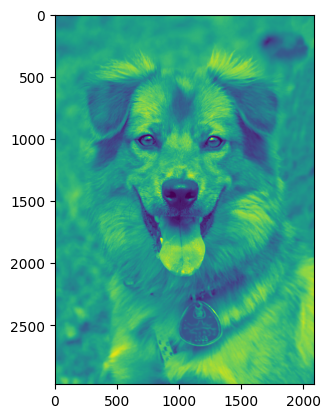

In [6]:
plt.imshow(image)

# PCA Impelementation From Scratch

**1- Mean and Covariance**

In [8]:
image_mean = np.mean(image_array, axis=0)
image_mean

array([146.32470588, 146.06857143, 145.76235294, ..., 155.41277311,
       156.06957983, 157.01882353])

In [9]:
image_covariance = np.cov(image_array - image_mean, rowvar=False)
image_covariance

array([[ 301.79432889,  297.22587761,  293.23791764, ..., -294.31228609,
        -299.64398592, -306.64330314],
       [ 297.22587761,  295.17216255,  292.31791527, ..., -295.16012297,
        -300.62817562, -307.79113652],
       [ 293.23791764,  292.31791527,  290.91761383, ..., -297.8813616 ,
        -303.44882551, -310.67777127],
       ...,
       [-294.31228609, -295.16012297, -297.8813616 , ..., 1344.14899617,
        1334.66225823, 1313.02753353],
       [-299.64398592, -300.62817562, -303.44882551, ..., 1334.66225823,
        1373.44942736, 1355.70918074],
       [-306.64330314, -307.79113652, -310.67777127, ..., 1313.02753353,
        1355.70918074, 1432.8597666 ]])

In [10]:
std = np.std(image_array, axis=0)
image_std = image_covariance/std
image_std

array([[ 17.37514911,  17.3030205 ,  17.19523523, ...,  -8.02893032,
         -8.08671676,  -8.10223141],
       [ 17.11213051,  17.18346337,  17.14128703, ...,  -8.05205958,
         -8.11327783,  -8.13255985],
       [ 16.88253242,  17.01730321,  17.05917449, ...,  -8.12629581,
         -8.18940082,  -8.20883147],
       ...,
       [-16.94438684, -17.18276249, -17.46752304, ...,  36.66880095,
         36.01953038,  34.6932505 ],
       [-17.25134781, -17.50108547, -17.79399464, ...,  36.4099998 ,
         37.06630878,  35.82099919],
       [-17.6543182 , -17.91807762, -18.2178942 , ...,  35.81979781,
         36.58753945,  37.85949765]])

**2- Eigen Vectors and Eigen Values**

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(image_std)

In [12]:
eigenvalues

array([2.07383239e+04, 1.44409177e+04, 9.64602655e+03, ...,
       7.25003429e-04, 7.43126399e-04, 7.29323158e-04])

In [13]:
eigenvectors

array([[ 5.74219442e-03,  3.68184472e-04, -1.31607108e-04, ...,
         1.46736515e-02,  1.71926051e-03, -8.74847631e-03],
       [ 5.81034442e-03,  2.36813220e-04, -1.93875280e-04, ...,
        -3.59483842e-02, -1.54094273e-02,  9.51199804e-03],
       [ 5.88788283e-03, -2.31935829e-05, -2.80222401e-04, ...,
         1.52848104e-02,  2.39251029e-03,  5.00885981e-03],
       ...,
       [-2.22647918e-02, -3.45967207e-03,  2.14943786e-02, ...,
        -1.15821908e-02, -1.50105042e-03,  1.63605126e-02],
       [-2.22567165e-02, -3.01936773e-03,  2.20988958e-02, ...,
         9.21634539e-04, -6.70241812e-03, -2.14224089e-04],
       [-2.18452056e-02, -1.99540356e-03,  2.35551346e-02, ...,
        -2.00309777e-04,  7.58599315e-03,  1.68406946e-05]])

In [14]:
# Sort the eigenvectors
sorted_eigenvectors = eigenvectors[:, eigenvalues.argsort()[::-1]]

In [15]:
sorted_eigenvectors

array([[ 5.74219442e-03,  3.68184472e-04, -1.31607108e-04, ...,
         3.44754734e-03, -8.95537155e-03,  1.09096743e-02],
       [ 5.81034442e-03,  2.36813220e-04, -1.93875280e-04, ...,
        -2.31415904e-03, -5.51321055e-03, -1.81378686e-02],
       [ 5.88788283e-03, -2.31935829e-05, -2.80222401e-04, ...,
        -1.16657232e-03,  8.38822677e-03,  8.07841513e-03],
       ...,
       [-2.22647918e-02, -3.45967207e-03,  2.14943786e-02, ...,
         4.42125405e-03, -1.74271658e-02, -6.48240937e-03],
       [-2.22567165e-02, -3.01936773e-03,  2.20988958e-02, ...,
        -4.78594752e-03,  3.23773102e-03, -1.28271680e-03],
       [-2.18452056e-02, -1.99540356e-03,  2.35551346e-02, ...,
         3.71441448e-03, -1.69952384e-03, -2.80597538e-03]])

In [17]:
# Project the image array
n_components = 100
image_projected = image_array - image_mean
image_projected = np.dot(image_projected,sorted_eigenvectors[:, :n_components])

# Compress the projected image array

In [18]:
compressed_image_array = np.real(image_projected).astype(np.float16)

# Decompress the compressed image array

In [19]:
decompressed_image_array = np.real(compressed_image_array).astype(np.float32)

In [20]:
# Project the decompressed image array back onto the original image space
decompressed_image_array  = np.dot(decompressed_image_array,sorted_eigenvectors[:, :n_components].T)

In [21]:
# Add the mean back to the decompressed image array
decompressed_image_array += image_mean

In [22]:
# Convert the decompressed image array back to a NumPy array
decompressed_image = np.asarray(decompressed_image_array, dtype=np.uint8)

# Plot The images

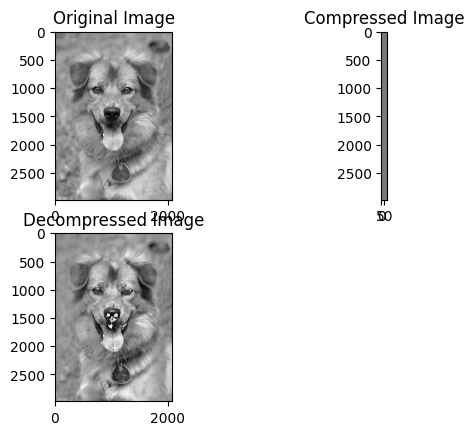

In [23]:
plt.subplot(221)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(222)
plt.imshow(compressed_image_array, cmap="gray")
plt.title("Compressed Image")

plt.subplot(223)
plt.imshow(decompressed_image, cmap="gray")
plt.title("Decompressed Image")


plt.show()